
# Analysis of Ramen Rating






### Content
+ Introduction: Ramen Rating
+ Data description
+ Research questions
+ Data preparation
+ Data analysis (visualisation)
+ Conclusion

## 1. Introduction: Ramen Rating

Ramen is a very popular noodle dish in the world. Ramen is typically Japanese dish, though they originally came from China. Ramen has become very popular in Japan and there are many shops that sell them. They are different in broth, soup flavours, toppings, noodle texture, and more.

Ramen shops are in various areas where local tastes are enjoyed. One of them is known for its pork ramen soup, the noodles are very thin and do not need to be boiled for very long to become soft. Another is known for its vegetables, such as ginger, onion, garlic and mushrooms.

This dataset is an export of "The Big List" (of reviews), converted to a CSV format. Each record in the dataset is a single ramen product review. Review numbers are contiguous: more recently reviewed ramen varieties have higher numbers. Brand, Variety (the product name), Country, and Style (Cup? Bowl? Tray?) are pretty self-explanatory. Stars indicate the ramen quality, as assessed by the reviewer, on a 5-point scale; this is the most important column in the dataset! 



Source(https://www.kaggle.com/residentmario/ramen-ratings)

## 2. Data description 


This dataset about the ramen rating among the world. It contains raw data about its quality, brand, type of ramen, where its restaurants are located and so on. To this analysis we will use dataset of 2017 year because it has the most recent and available data.
Below is data that we will use for our analysis:




+ Brand - the name of the restaurant
+ Variety - the type of ramen noodles
+ Style - type of packaging like a pack, bowl, cup
+ Country - The column about country names  
+ Stars - Ramen rating among consumers which indicate the ramen quality, as assessed by the reviewer, on a 5-point scale
+ Top Ten - Rating of the most popular 10 ramens



## 3. Research questions





For this project, data analysis and visualization contains 5 parts:
1. Analyze how many ramen restaurants(brand) are in the Top 10 countries.
2. Analyze the rating(stars) which are most commonly used to rate ramen restaurant(brand) in various country
3. Analyze the number of styles of packaging(pack, bowl, cup) people prefer
4. Analyze how many ramen varieties are in each brand.
5. Analyze the higher rated type of styles (between 4.5 and 5.0)

## 4. Data preparation



In [3]:
hp_file = open(file='ramen-ratings.csv', mode='r')
#this code opens the dataset

In [7]:
hp_file = open(file='ramen-ratings.csv', 
               mode='r', 
               encoding="ISO-8859-1") 

In [8]:
firstline = hp_file.readline()
print(firstline)
# these codes show needed lines 

Review #,Brand,Variety,Style,Country,Stars,Top Ten



In [9]:
secondline = hp_file.readline()
print(secondline)


2580,New Touch,T's Restaurant Tantanmen ,Cup,Japan,3.75,



In [10]:
fourthline = hp_file.readline()
print(fourthline)

2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles,Pack,Taiwan,1,



In [11]:
fifthline = hp_file.readline()
print(fifthline)


2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,



In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [176]:
df = pd.read_csv('ramen-ratings.csv')
df
#this code reads the dataframe

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [30]:
len(df["Review #"].unique())

2580

In [34]:
df.drop("Review #", axis=1, inplace=True)
#this code removes any row containing missing data

In [39]:
df

,Brand,Variety,Style,Country,Stars,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [40]:
df.head(100)
#this code shows first 100 rows.

,Brand,Variety,Style,Country,Stars,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...
95,Nissin,Cup Noodles Shrimps,Cup,Germany,3,NaN
96,Nissin,Demae Ramen Tokyo Soy Sauce,Pack,Germany,4,NaN
97,Paldo,Bul Jjamppong,Bowl,South Korea,5,NaN
98,TTL,Chicken With Chinese Shaoxing Wine,Pack,Taiwan,4.75,NaN


In [55]:
df1 = df.dropna(how='all')
df1
# it means that this dataset doesn't have row without any data

,Brand,Variety,Style,Country,Stars,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [47]:
df.drop_duplicates()
df
#len(df["Review #"].unique()) I cheched it before and the output was 2580
#Since there are  unique values in "Review #" column,
#it means that there are no duplicates.

,Brand,Variety,Style,Country,Stars,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...
2575,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [57]:
df.shape
#this code shows the size

(2580, 6)

In [285]:
df.describe()

,Review #
count,2096.000000
mean,1277.188931
std,749.449774
min,1.000000
25%,634.750000
50%,1271.500000
75%,1926.250000
max,2580.000000


In [45]:
ramen_style = df.groupby(['Country','Style'], as_index=False).agg({'Variety':'count'})
ramen_style.head(10)
#I made a grouping of countries and styles and 
#the number of varieties people prefer

,Country,Style,Variety
0,Australia,Cup,17
1,Australia,Pack,5
2,Bangladesh,Pack,7
3,Brazil,Cup,2
4,Brazil,Pack,3
5,Cambodia,Pack,5
6,Canada,Bowl,8
7,Canada,Cup,17
8,Canada,Pack,16
9,China,Bowl,45


In [46]:
ramen_country = df.groupby('Country').agg({'Brand':'count'})
ramen_country = ramen_country.rename(columns = {'Brand':'Amount of brand'})
ramen_country = ramen_country.sort_values(['Amount of brand', 'Country'], ascending = [False, True])
ramen_country.head(10)
# I made a grouping of the top 10 countries 
#which have the most amount of ramen brand

,Amount of brand
Country,
Japan,352
USA,323
South Korea,309
Taiwan,224
Thailand,191
China,169
Malaysia,156
Hong Kong,137
Indonesia,126


In [177]:
brand_variety = df.groupby('Brand').agg({'Variety':'count'})
brand_variety = brand_variety.rename(columns = {'Variety':'Amount of variety'})
brand_variety = brand_variety.sort_values(['Amount of variety', 'Brand'], ascending = [False, True])
brand_variety.head(10)
# I made a grouping of brands 
#to find the amount of variety in each of them

,Amount of variety
Brand,
Nissin,381
Nongshim,98
Maruchan,76
Mama,71
Paldo,66
Myojo,63
Indomie,53
Samyang Foods,52
Ottogi,46


In [47]:
df['Style'].value_counts()
#I counted the number of styles in order to 
#find the most popular in them and to draw a histogram of it

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [48]:
a = df.groupby(['Brand','Stars'], as_index=False)['Country'].count()
a.tail(10)
#I made a grouping of brands and ratings and 
#the number of countries where these cafes are located

,Brand,Stars,Country
1208,Yum Yum,4,1
1209,Yum Yum,5,2
1210,Yum-Mie,3.5,1
1211,Zow Zow,3.75,1
1212,iMee,2.75,1
1213,iMee,3.25,1
1214,iMee,3.5,1
1215,iMee,4.5,1
1216,iNoodle,2.25,1
1217,iNoodle,3.75,1


In [49]:
df['Top Ten'].fillna('not ranked',inplace=True)
df.loc[df["Top Ten"] =="\n",'Top Ten'] = 'not ranked'
df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,not ranked
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,not ranked
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,not ranked
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,not ranked
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,not ranked
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,not ranked
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,not ranked
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,not ranked
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,not ranked


## 5. Data analysis (visualisation)

### 5.1 Q1: Analyze how many ramen restaurants(brand) are in the Top 10 countries.



Text(0, 0.5, 'COUNTRIES')

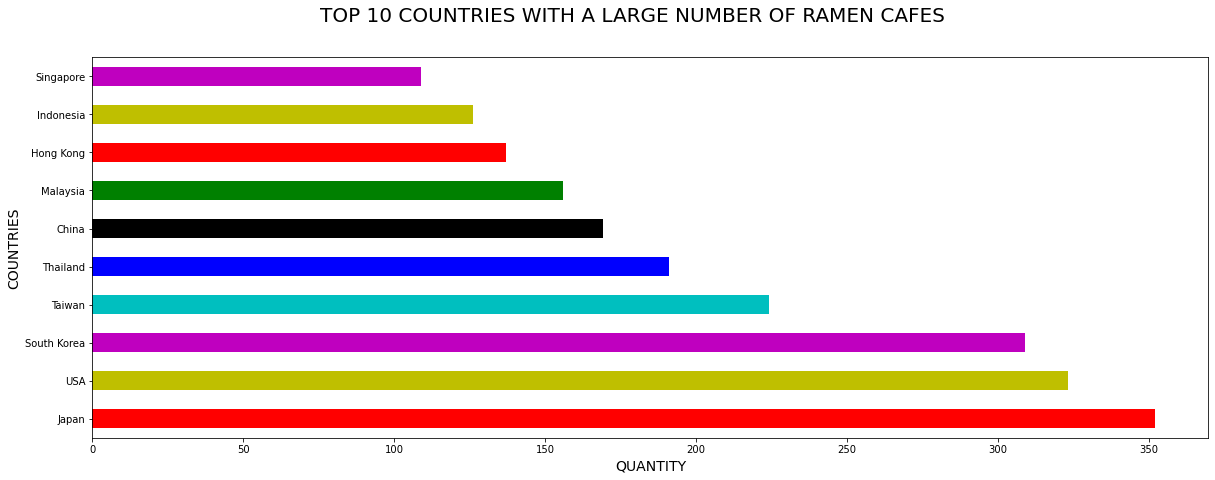

In [9]:
plt.figure(figsize=(20, 7))
df["Country"].value_counts().head(10).plot(kind='barh',
stacked=True, color = list('rymcbkg'))
plt.suptitle('TOP 10 COUNTRIES WITH A LARGE NUMBER OF RAMEN CAFES', size=20)
plt.xlabel('QUANTITY', size=14)
plt.ylabel('COUNTRIES', size=14)

#Counting the number of countries that are most 
#commonly used, we can find how many ramen 
#cafes there are in this country.   

##### We use this code to look at the number of ratings by country and sort them. Here you can safely note that the countries of Asia and the United States have the highest ratings of ramen. We only get the top 10 countries out, because if we get all the countries out, it will look very confusing. And by displaying only 10 countries, we get a nice and clear graph.


------------------------------------------------------------------------------------------------------------------

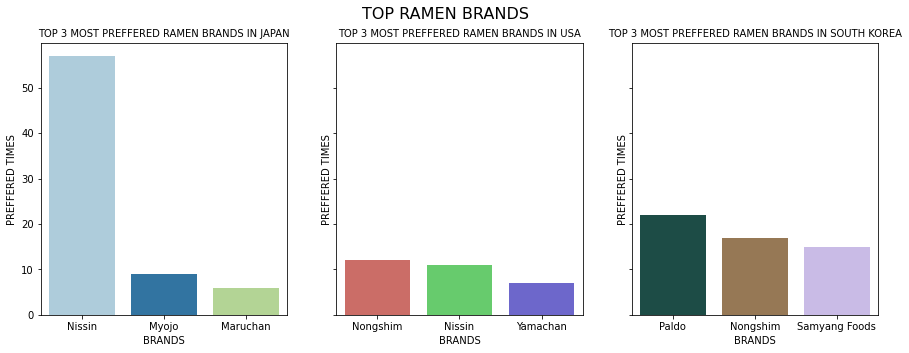

In [134]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

fig.suptitle('TOP RAMEN BRANDS',size = 16)
axes[0].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN JAPAN',size=10)
axes[1].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN USA',size=10)
axes[2].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN SOUTH KOREA',size=10)
axes[0].set_ylabel('PREFFERED TIMES', size=10)
axes[0].set_xlabel('BRANDS', size=10)
axes[1].set_ylabel('PREFFERED TIMES', size=10)
axes[1].set_xlabel('BRANDS', size=10)
axes[2].set_ylabel('PREFFERED TIMES', size=10)
axes[2].set_xlabel('BRANDS', size=10)

# JAPAN
japan=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4.5)]
x_japan= japan['Brand'].value_counts()
x_japan= x_japan[:3,]
sns.barplot(ax=axes[0],x=x_japan.index, y=x_japan.values,palette="Paired")

# USA
usa=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4.5)]
x_usa= usa['Brand'].value_counts()
x_usa= x_usa[:3,]
sns.barplot(ax=axes[1],x=x_usa.index,y= x_usa.values,palette="hls")

# SOUTH KOREA
south_korea=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4.5)]
x_sk= south_korea['Brand'].value_counts()
x_sk= x_sk[:3,]
sns.barplot(ax=axes[2],x=x_sk.index,y= x_sk.values,palette="cubehelix")


plt.show()

#Counting the number of brands which are most 
#commonly preferred in the top 3 countries. 
#We can find how many times 
#ramen brands preferred in Japan, USA and South Korea.   

#### As we can notice, there are top 3 countries which consume ramen mostly. Japan, USA and South Korea. Nissin brand in Japan differs from the other 2 brands clearly, while brands in the USA and South Korea shows almost the same result and demonstrates little difference with each other.


------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

### 5.1 Q2: Analyze the rating(stars) which are most commonly used to rate ramen restaurant(brand) in various country



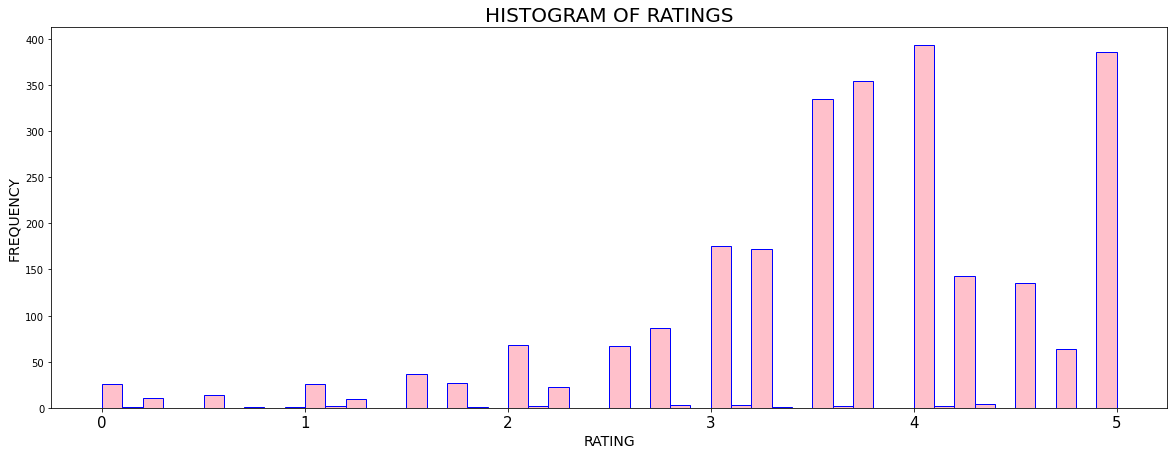

In [114]:
plt.figure(figsize=(20, 7))
plt.hist(df["Stars"], bins=50, color = "pink", edgecolor='Blue')
df.sort_values(by=['Stars']).agg({'Brand':'count'})
plt.xlabel("RATING", size=14)
plt.ylabel("FREQUENCY", size=14)
plt.title("HISTOGRAM OF RATINGS", size=20)
plt.xticks (size=15)
plt.show()

#Counting the number of ratings that are 
#most commonly rated all ramen cafes

##### We use this code to look at the number of ratings that are most commonly rated all ramen cafes and sort them by ascending order. Here you can notice that the stars ''4'' and ''5''  have the highest ratings of frequency compared to other values. 

------------------------------------------------------------------------------------------------------------------

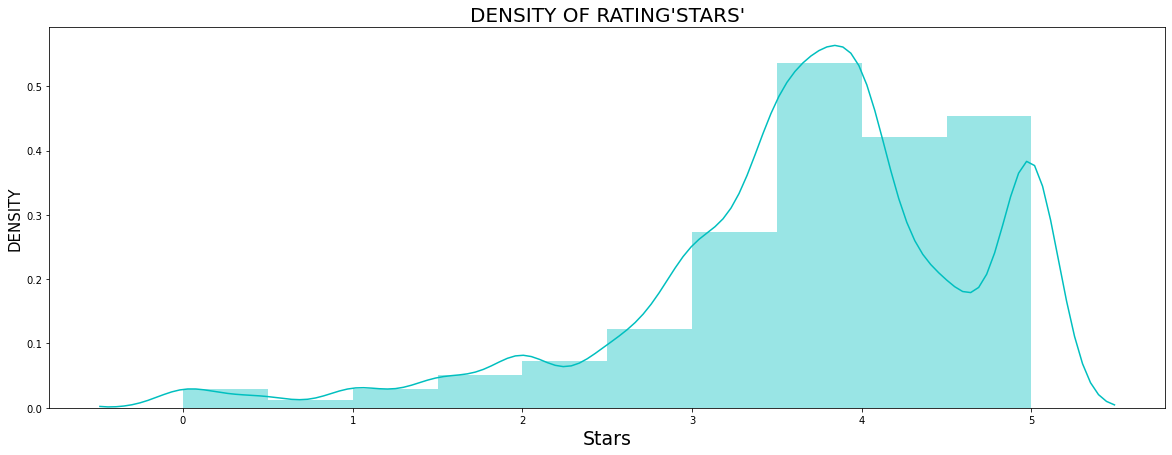

In [181]:
df['Stars']= pd.to_numeric(df['Stars'],errors = 'coerce') #In this data frame "Stars" inserted
                                                          #as a string, so we converted it to numeric
plt.figure(figsize=(20,7))
plt.xlabel("STARS", size=19)
plt.ylabel("DENSITY", size=15)
plt.title("DENSITY OF RATING'STARS'", size=20)
sns.distplot(df['Stars'],bins=10, color="c")
plt.show()

#Showing the density of rating stars

##### Here it is noticeable that the stars "4" and "5" have the most remarkable repeatability indicators and a thicker density compared to other values.



------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

### 5.1 Q3:  Analyze the number of styles of packaging(pack, bowl, cup) people prefer




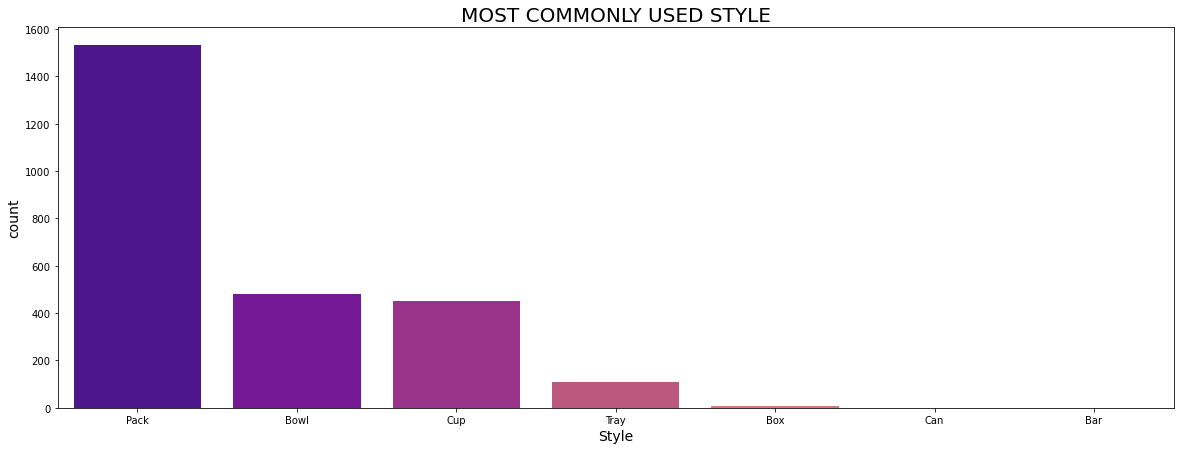

In [6]:
plt.figure(figsize=(20, 7))
plt.xlabel("STYLE", size=14)
plt.ylabel("COUNT", size=14)
plt.title("MOST COMMONLY USED STYLE", size=20)
sns.countplot(data=df,x='Style',palette="plasma", order = df['Style'].value_counts().index);

#we can understand that, what kind of dishes for serving food many people prefer

##### We use this code to see different types of ramen packaging, amount and which ones are more popular and in demand. (Before this, we found the most popular in data preparation                        Ramen styles have an instant variety of packaging, like ramen with a pack, bowl, cup and tray, which are popular comparatively.                                 While box, can and bar almost irrelevant. 

------------------------------------------------------------------------------------------------------------------

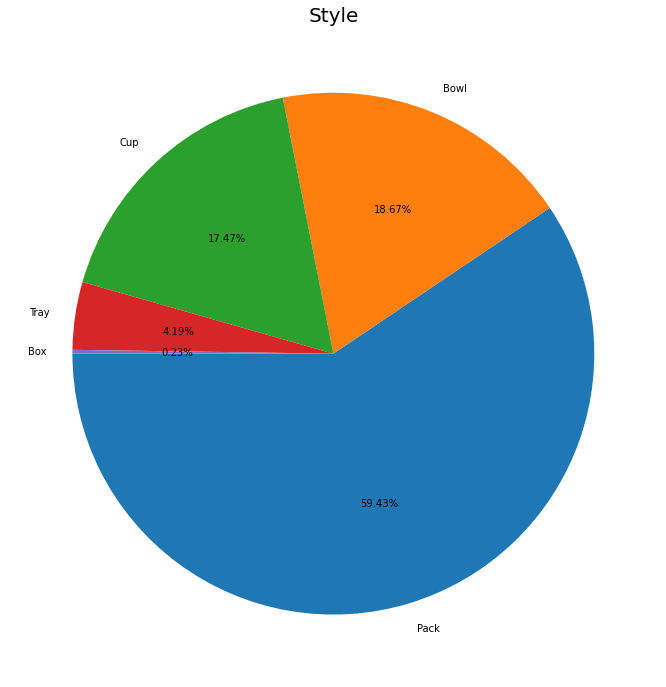

In [7]:
labels = 'Pack', 'Bowl', 'Cup' , 'Tray', 'Box'
size = [1531, 481, 450, 108, 6]
fig, ax = plt.subplots(1,1, figsize= (12,12))
ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.set_title("Style", size = 20)
plt.show()

#I didn't include 'Bar' and 'Can' because, they only
#appear once in our data. We can find its amount in data 
#preparation

#### It will not need to make an effort to see that Pack is the most popular style in ramen restaurants for consumers, while Bowl and Cup have almost the same percentage. The box is an unpopular one which only 0.23 per cent of clients order.




------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

### 5.1 Q4:  Analyze how many ramen varieties are in each brand.



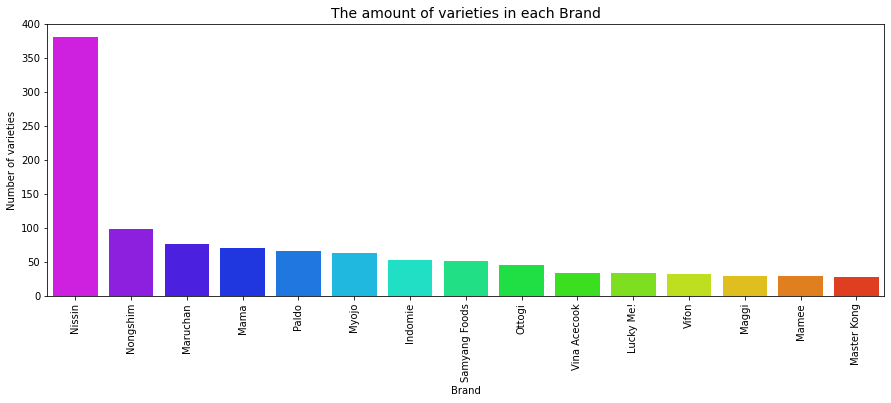

In [180]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df["Brand"], data = brand_variety, palette="gist_rainbow_r",
              order = df["Brand"].value_counts().iloc[:15].index );
plt.title( 'The amount of varieties in each Brand', fontsize=14)
plt.ylabel('Number of varieties')
plt.xticks(rotation = 90) 
plt.show()

#In data preparation, I grouped brands to count
#varieties in each of them. In this code, we 
#outputted only first 15 brands and found the 
#number of varieties in each Brand

#### Here it is obvious that the Nissin brand differs sharply from other brands almost 4 times more, while the rest show approximately the same result



------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

### 5.1 Q5:  Analyze the higher rated type of styles (between 4.5 and 5.0)


Text(0, 0.5, 'AMOUNT')

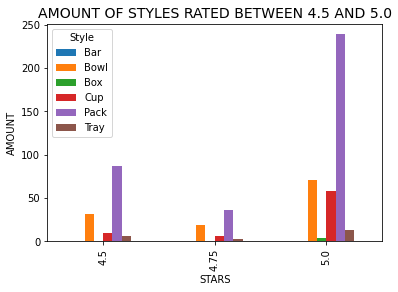

In [182]:
df_high=df[df['Stars']>4.3]
a = pd.crosstab(df_high['Stars'],df_high['Style']).plot(kind='bar') 
plt.title( 'AMOUNT OF STYLES RATED BETWEEN 4.5 AND 5.0', fontsize=14)
plt.xlabel('STARS')
plt.ylabel('AMOUNT')
# Amount of styles having more than 4.3 

#### Here you can see that the packaging style is leading in the ranking, while the bowl, Cup and tray occupy 2, 3 and 4 places in rating between 4.5 and 5.0, respectively


------------------------------------------------------------------------------------------------------------------

Text(0, 0.5, 'AMOUNT OF STARS')

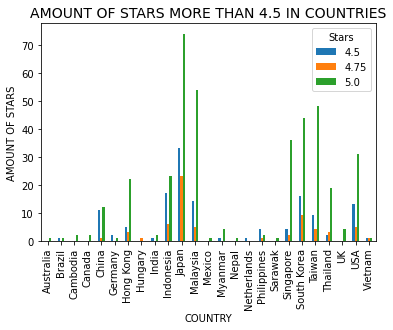

In [184]:
pd.crosstab(df_high['Country'],df_high['Stars']).plot(kind='bar') 
plt.title( 'AMOUNT OF STARS MORE THAN 4.5 IN COUNTRIES', fontsize=14)
plt.xlabel('COUNTRY')
plt.ylabel('AMOUNT OF STARS')
#Countries having more than 4.5 stars

#### We use this code to analyze countries which have to rate more than 4.5. As understandable, Asia countries such as Japan, Malaysia, Taiwan, South Korea and Singapore leads in this graph and showing that as based they have 5.0 rating.



------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

In [ ]:
hp_file.close() 

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

 ## 6. Conclusion

Based on our analysis, we are able to conclude a few things about in "Ramen Ratings" dataset.


First, many popular brands are distributed in different countries and have a good and high rating.


Secondly, you can safely say that Asian countries are good as Ramen and have high popularity compared to other countries and a very large number of restaurants.


Third, you can see that many consumers taste the same in choosing the packaging of noodles. Since only two or three types have a high percentage, while the rest have an insignificant percentage.


Fourth, the main high rating is available in Asian countries such as 4.75, 5.0 and vice versa, very few low ratings like 2.0 and 3.0